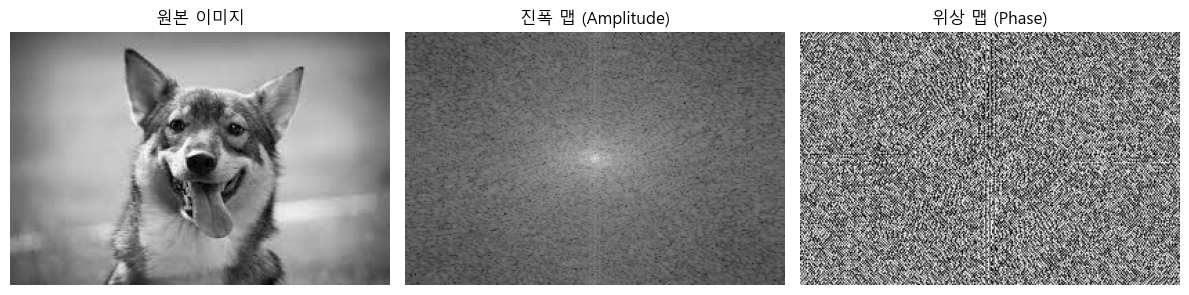

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from scipy.fftpack import fft2, fftshift

# 한글 사용하기 위한 설정
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False

image1 = Image.open('dog.jpg').convert('L')
image2 = Image.open('please.jpg').convert('L')

# 2D FFT 수행
fft_image1 = fft2(image1)

# 주파수 스펙트럼 시프트
fft_shifted1 = fftshift(fft_image1)

# 진폭(amplitude) 계산 (복소수 크기)
amplitude1 = np.abs(fft_shifted1)

# 위상(phase) 계산 (복소수의 각도)
phase1 = np.angle(fft_shifted1)

# 진폭과 위상 맵 시각화
plt.figure(figsize=(12, 6))

plt.subplot(131)
plt.imshow(image1, cmap='gray')
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(132)
plt.imshow(np.log1p(amplitude1), cmap='gray')
plt.title('진폭 맵 (Amplitude)')
plt.axis('off')

plt.subplot(133)
plt.imshow(phase1, cmap='gray')
plt.title('위상 맵 (Phase)')
plt.axis('off')

plt.tight_layout()
plt.show()


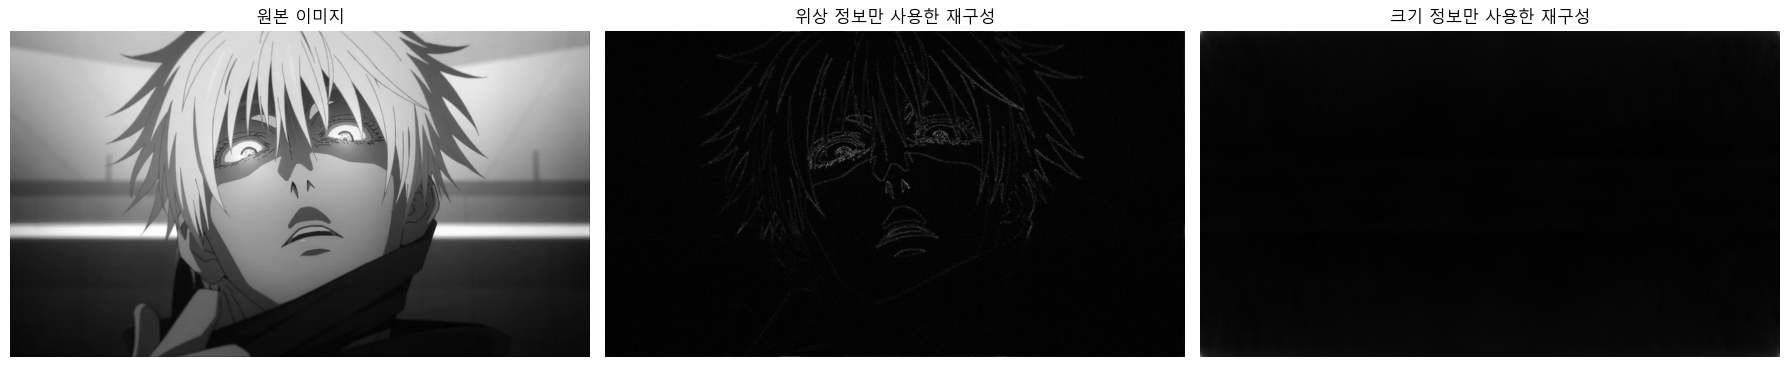

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fftpack import fft2, ifft2, fftshift, ifftshift
from skimage.color import rgb2gray
from skimage.io import imread

# 이미지 로드 및 회색조 변환
image = imread('please.jpg')
gray_image = rgb2gray(image)

# 2D FFT 수행
fft_image = fft2(gray_image)
fft_shifted = fftshift(fft_image)

# 진폭과 위상 계산
magnitude = np.abs(fft_shifted)
phase = np.angle(fft_shifted)

# 위상만을 사용한 재구성 (크기 정보를 무시)
reconstructed_phase_only = np.abs(ifft2(ifftshift(np.exp(1j * phase))))

# 크기만을 사용한 재구성 (위상 정보를 무시)
reconstructed_magnitude_only = np.abs(ifft2(ifftshift(magnitude)))

# 원본 이미지, 위상 재구성 이미지, 크기 재구성 이미지 시각화
plt.figure(figsize=(18, 6))

plt.subplot(131)
plt.imshow(gray_image, cmap='gray')
plt.title('원본 이미지')
plt.axis('off')

plt.subplot(132)
plt.imshow(reconstructed_phase_only, cmap='gray')
plt.title('위상 정보만 사용한 재구성')
plt.axis('off')

plt.subplot(133)
plt.imshow(reconstructed_magnitude_only, cmap='gray')
plt.title('크기 정보만 사용한 재구성')
plt.axis('off')

plt.tight_layout()
plt.show()
